### Latent Learning

In this module, the agent will first explore the maze for 10 episodes with no task and no rewards. The episode ends if the agent during trial-and-error exploration enters a terminal state.

In [1]:
import numpy as np
import random
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

import utils
from env import Maze
from agent import QAgent, TemporalDifferenceSuccessor, TemporalDifferenceSuccessor_latent, TemporalDifferenceSuccessor_tasks
from RL import ReinforcementLearning

%load_ext autoreload
%autoreload 2

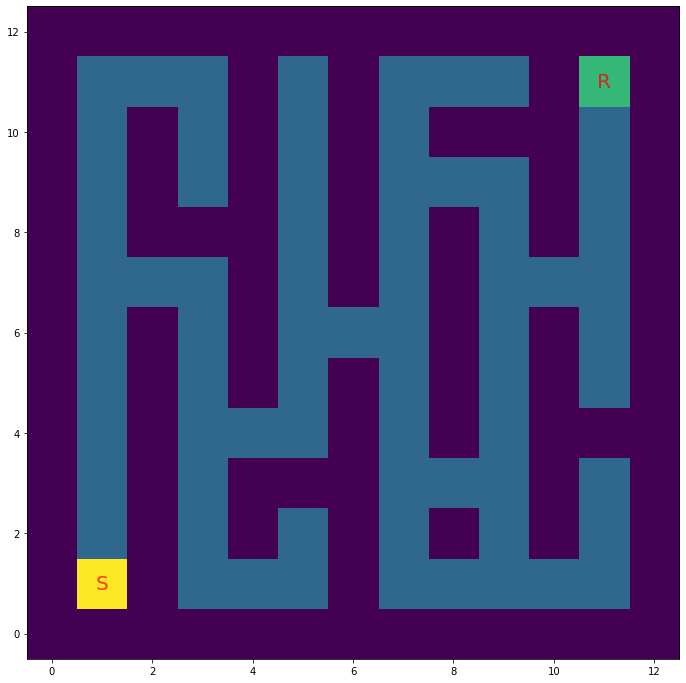

In [2]:
#Load in environment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])


In [6]:
#Set up agent
agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.005,
    'replay':True, 
    'num_replay_steps':2,
    'replay': False
    
}

## Latent Learning task

In [23]:
def LatentLearning(agent, agent_info, exploration=True):
    """
    This function simulates how the agent reacts to moving the reward state
    """
    total_num_steps = []
    RL = ReinforcementLearning(Maze, agent)
    
    reward_states = [(9, 3), (11, 11), (11, 9), (3, 11)]
    
    optimal_num_steps = [18, 15, 8, 12]
    
    list_num_episodes = []
    
    RL.rl_init(env_info, agent_info)
    
    if exploration:
        NUM_EXPLORATION_STEPS=1000000
        RL.rl_explore_env(NUM_EXPLORATION_STEPS)
        
    #Save the SR to reset the agent
    if agent_info['SR']:
        SR = RL.agent.M
        
        
    #Confront agent with new task
    for i, state in enumerate(tqdm(reward_states)):
        #Reset the TD Agent
        if agent_info['SR']:
            RL.agent.M = SR
        
        num_episodes = 0
        
        num_steps = np.inf
        
        RL.rl_change_task(reward_states=[state])
        
        #Confront agent with new task
        RL.rl_episode()
        
        #While not converged
        while num_steps > optimal_num_steps[i]+5:
            num_episodes += 1
            
            #Let agent simulate new environment
            if agent_info['replay']:
                RL.learn_offline(50000)

            #Test if agent learned environment
            RL.rl_episode()

            num_steps = RL.num_steps            
            
        list_num_episodes.append(num_episodes)
        
    
    plt.figure(figsize=(12, 12))
    plt.bar([str(state) for state in reward_states], list_num_episodes)
    plt.ylim(0, 30)
    plt.show()


    return list_num_episodes

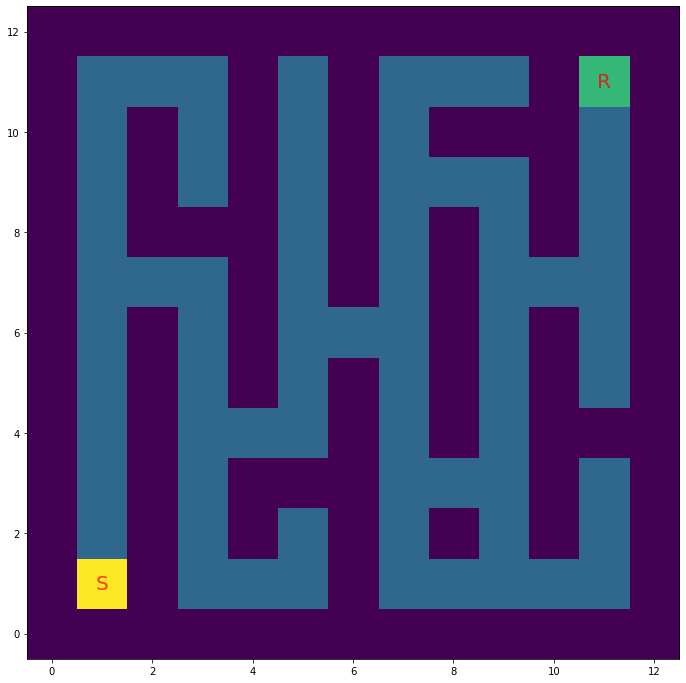

In [24]:
#Load in environment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])
env_info['start_state'] = (6, 6)


In [25]:
list_num_episodes = []

100%|██████████| 4/4 [00:12<00:00,  3.16s/it]


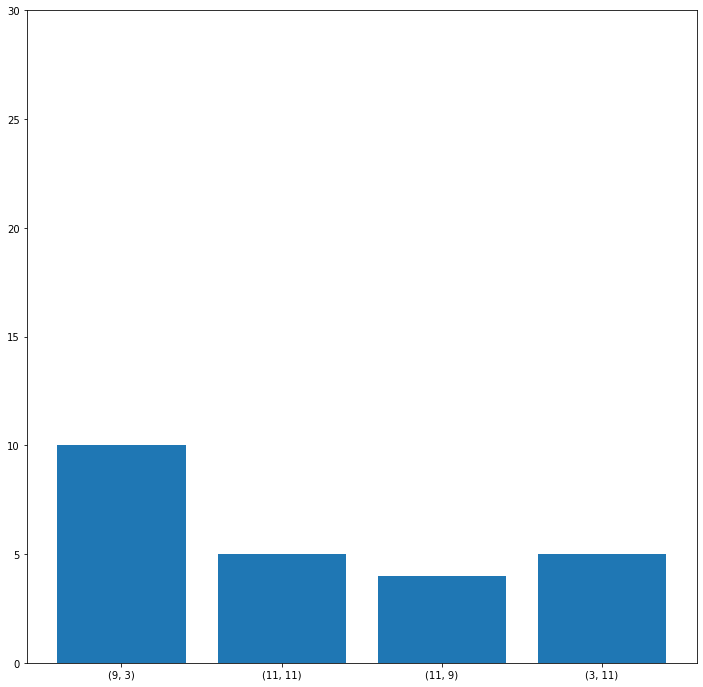

In [26]:
agent_info = agent_info = {
    'SR':True, 
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.01,
    'replay':False, 
}

list_num_episodes.append(LatentLearning(TemporalDifferenceSuccessor_latent, agent_info))

100%|██████████| 4/4 [00:02<00:00,  2.00it/s]


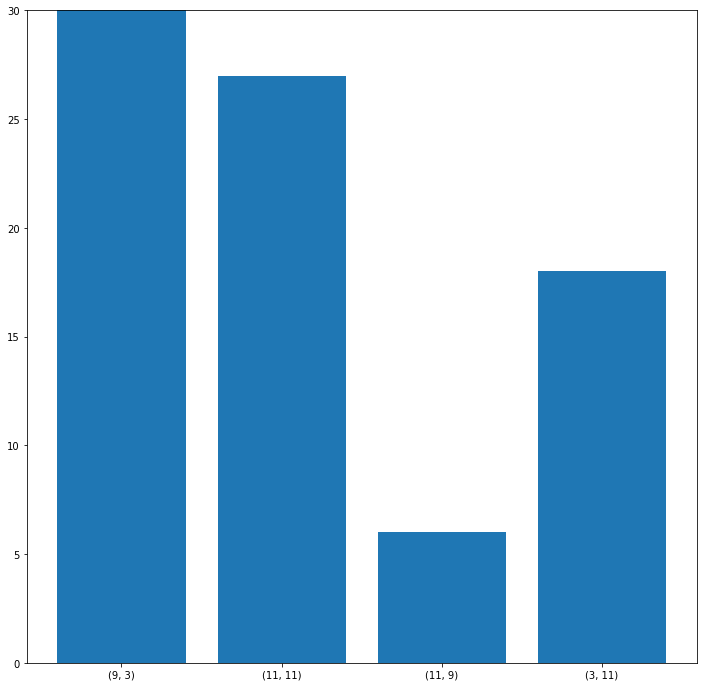

In [27]:
agent_info = agent_info = {
    'SR':False,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.005,
    'replay':False,    
}


list_num_episodes.append(LatentLearning(QAgent, agent_info))

100%|██████████| 4/4 [00:09<00:00,  2.39s/it]


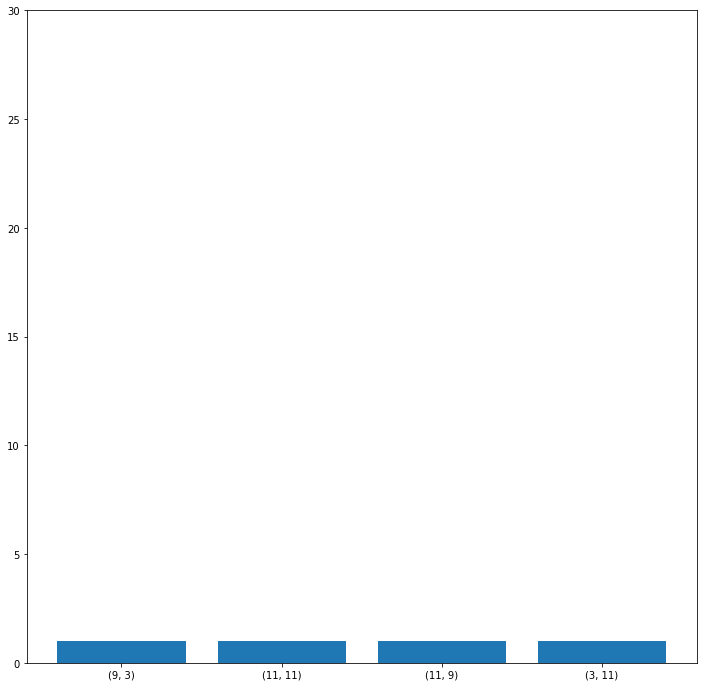

In [29]:
agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.01,
    'replay':True,
    'num_replay_steps':10
}


list_num_episodes.append(LatentLearning(TemporalDifferenceSuccessor_latent, agent_info))




<ipython-input-30-4f280704f86b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize=15)


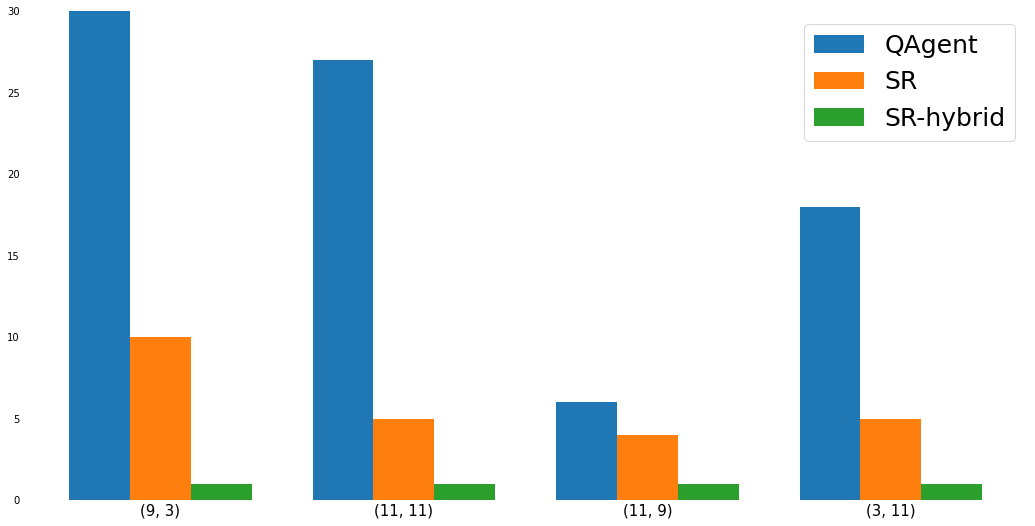

In [30]:
fig, ax = plt.subplots(figsize=(18, 9))
plt.bar([0.25, 1.25, 2.25, 3.25], list_num_episodes[1], label="QAgent", width=0.25)
plt.bar([0.5, 1.5, 2.5, 3.5], list_num_episodes[0], label="SR", width=0.25)
plt.bar([0.75, 1.75, 2.75, 3.75], list_num_episodes[2], label="SR-hybrid", width=0.25)
plt.ylim(0, 30)

labels = [item.get_text() for item in ax.get_xticklabels()]

labels[2] = "(9, 3)"
labels[4] = "(11, 11)"
labels[6] = "(11, 9)"
labels[8] = "(3, 11)"
ax.set_xticklabels(labels, fontsize=15)
plt.legend(prop={'size': 25})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

## Reward Reevaluation task

In [17]:
def RewardReevaluation(agent, agent_info, exploration=True):
    """
    This function simulates how the agent reacts to moving the reward state
    """
    total_num_steps = []
    RL = ReinforcementLearning(Maze, agent)
    
    
    RL.rl_init(env_info, agent_info)
    
    if exploration:
        NUM_EXPLORATION_STEPS=1000000
        RL.rl_explore_env(NUM_EXPLORATION_STEPS)
        
    
    count_right = 0
    
    
    
    if agent_info['replay']:
        RL.confront_with_final_trajectory()
    
    
    print("Initial")
    #Until agent was right 3 times
    while count_right<3:
    
        RL.rl_episode()

        #Get final state
        final_state = RL.trajectory[-1]
        
        if final_state==utils.matrix_to_ndarray((3, 11), env_info['width']):
            count_right += 1
            
            
    #Change task
    RL.rl_change_task(rewards=[1, 1000])
    
    #Confront agent with new reward
    if agent_info['replay']:
        for _ in range(10):
            RL.confront_with_final_trajectory()

    num_episodes = 0
    
    final_state = None
    
    while final_state != utils.matrix_to_ndarray((11, 11), env_info['width']):
        num_episodes += 1
        RL.rl_episode()

        if agent_info['replay']:
            RL.learn_offline(50000)

        final_state = RL.trajectory[-1]
        

    print(f"Reevaluated in {num_episodes} steps")
        
    return num_episodes

In [18]:
num_episodes = []

In [19]:
env_info['reward_states'] = [(3, 11), (11, 11)]

env_info['rewards'] = [10, 1]


agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.01,
    'replay':False,
}


num_episodes.append(RewardReevaluation(QAgent, agent_info))

Initial
Reevaluated in 170 steps


In [20]:
env_info['reward_states'] = [(3, 11), (11, 11)]

env_info['rewards'] = [10, 1]


agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.1,
    'discount_factor':0.9,
    'epsilon':0.01,
    'replay':False,
}


num_episodes.append(RewardReevaluation(TemporalDifferenceSuccessor_tasks, agent_info))

Initial
Reevaluated in 3 steps


In [21]:
env_info['reward_states'] = [(3, 11), (11, 11)]

env_info['rewards'] = [10, 1]


agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.01,
    'replay':True,
    'num_replay_steps':10
}


num_episodes.append(RewardReevaluation(TemporalDifferenceSuccessor_tasks, agent_info))

Initial
Reevaluated in 1 steps


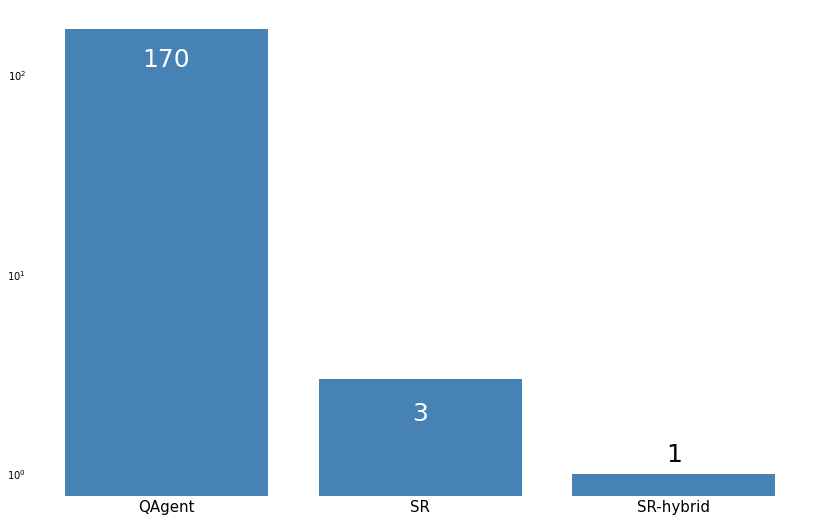

In [25]:
fig, ax = plt.subplots(figsize=(14, 9))
plt.bar([str(agent) for agent in ['QAgent', 'SR', 'SR-hybrid']], num_episodes, color="steelblue")
#plt.ylim(0, 30)
plt.yscale("log")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(fontsize=15)
plt.text(0, 120, str(num_episodes[0]), fontsize=25, color="white",ha="center", va="center", )
plt.text(1, 2, str(num_episodes[1]), fontsize=25, color="white",ha="center", va="center", )
plt.text(2, 1.25, str(num_episodes[2]), fontsize=25, color="black",ha="center", va="center", )
plt.show()

## Transition Reevaluation

In [47]:
def TransitionReevaluation(agent, agent_info, exploration=True):
    """
    This function simulates how the agent reacts to moving the reward state
    """
    total_num_steps = []
    RL = ReinforcementLearning(Maze, agent)
    optimal_steps = 16
    
    
    RL.rl_init(env_info, agent_info)
    
    if exploration:
        NUM_EXPLORATION_STEPS=1000000
        RL.rl_explore_env(NUM_EXPLORATION_STEPS)
        
        
    
    wall_passed = 0
    for _ in range(5):
        RL.rl_episode()
        if 125 in RL.trajectory:
            wall_passed += 1
            
    print(f"The wall was passed in {(round(wall_passed/5, 3))*100}% cases!")

    
    
    walls = env_info['walls'].copy()
    
    walls.append((9, 8))
    
    
    RL.rl_change_env(walls)
    
    RL.rl_change_task(rewards=[100])
    

    print("Confront")
    for _ in range(125):
        if agent_info['replay']:
            RL.confront_with_wall((125))
        else:
            RL.rl_episode()
    print("Done")
    
    print("Replay")
    if agent_info['replay']:
        RL.learn_offline(50000)
    
    print("Done")
    

    num_steps = np.inf
    num_episodes = 0
    max_episodes = 20
    
    print("While loop")
    while (num_steps > 16+3) & (num_episodes < max_episodes):
        num_episodes += 1
        RL.rl_episode()
        if agent_info['replay']:
            RL.learn_offline(50000)
            
        
        num_steps = RL.num_steps
    
    
    if num_episodes==max_episodes:
        print("Failed to Solve task!")
    else:
        print(f"Finished in {num_episodes} episodes")
        
    return num_episodes

In [48]:
num_episodes = []

In [49]:
env_info['reward_states'] = [(11, 11)]
env_info['rewards'] = [10]


agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.1,
    'discount_factor':0.9,
    'epsilon':0.1,
    'replay':False,
}


num_episodes.append(TransitionReevaluation(TemporalDifferenceSuccessor_tasks, agent_info))

The wall was passed in 80.0% cases!
Confront
Done
Replay
Done
While loop
Failed to Solve task!


In [50]:
env_info['reward_states'] = [(11, 11)]
env_info['rewards'] = [10]


agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.01,
    'replay':False,
}


num_episodes.append(TransitionReevaluation(QAgent, agent_info))

The wall was passed in 100.0% cases!
Confront
Done
Replay
Done
While loop
Failed to Solve task!


In [51]:
env_info['reward_states'] = [(11, 11)]
env_info['rewards'] = [10]

agent_info = agent_info = {
    'SR':True,
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.3,
    'discount_factor':0.9,
    'epsilon':0.2,
    'replay':True,
    'num_replay_steps':10
}


num_episodes.append(TransitionReevaluation(TemporalDifferenceSuccessor_tasks, agent_info))

The wall was passed in 100.0% cases!
Confront
Done
Replay
Done
While loop
Failed to Solve task!
